Importing Libraries

In [1]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime
import pandas as pd

Fetching Data

In [2]:
# Specify the path to the CSV file
csv_filename = r'Taxi_Trips__2013-2023__20240417.csv'

# Read data from the CSV file, excluding rows where "Trip Miles" is 0
data = []
with open(csv_filename, 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Trip Miles'] != '0':
            data.append(row)

Displaying the Data

In [3]:
for row in data[:10]:
    print(row)

{'Trip Start Timestamp': '09/23/2014 12:30:00 PM', 'Trip Miles': '1.5', 'Pickup Community Area': '32', 'Dropoff Community Area': '8'}
{'Trip Start Timestamp': '09/10/2014 08:00:00 PM', 'Trip Miles': '1.8', 'Pickup Community Area': '8', 'Dropoff Community Area': '8'}
{'Trip Start Timestamp': '08/18/2014 09:15:00 PM', 'Trip Miles': '0.1', 'Pickup Community Area': '33', 'Dropoff Community Area': '33'}
{'Trip Start Timestamp': '09/04/2014 11:45:00 PM', 'Trip Miles': '2.9', 'Pickup Community Area': '32', 'Dropoff Community Area': '7'}
{'Trip Start Timestamp': '09/04/2014 06:00:00 PM', 'Trip Miles': '8', 'Pickup Community Area': '76', 'Dropoff Community Area': ''}
{'Trip Start Timestamp': '09/23/2014 04:15:00 PM', 'Trip Miles': '1', 'Pickup Community Area': '32', 'Dropoff Community Area': '8'}
{'Trip Start Timestamp': '10/11/2015 02:00:00 AM', 'Trip Miles': '7.5', 'Pickup Community Area': '7', 'Dropoff Community Area': '1'}
{'Trip Start Timestamp': '09/05/2014 10:00:00 AM', 'Trip Miles': '1.

Sorting the Data by Month

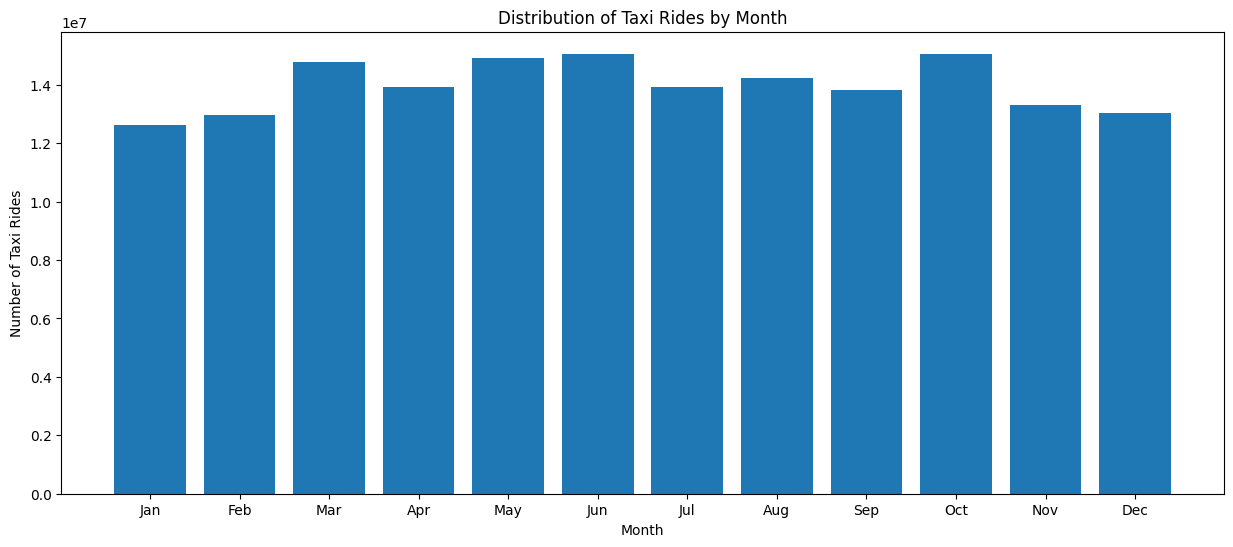

        Month  Taxi Rides
0     January    12602566
1    February    12943991
2       March    14772134
3       April    13905585
4         May    14905124
5        June    15052106
6        July    13927353
7      August    14241353
8   September    13812321
9     October    15057888
10   November    13287013
11   December    13032484


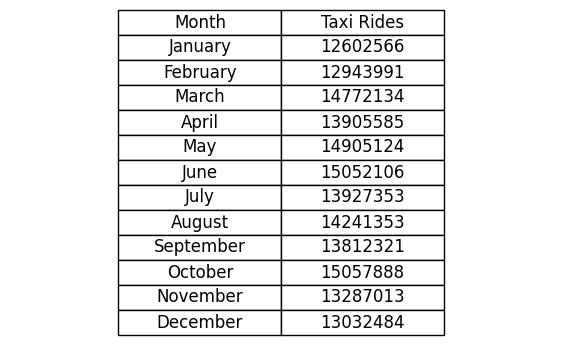

In [4]:
if data:
    # Initialize a defaultdict to count taxi rides by month
    month_counts = defaultdict(int)
    
    # Extract month from trip_start_timestamp for each record and count occurrences
    for record in data:
        start_timestamp = record.get("Trip Start Timestamp", "")
        if start_timestamp:
            start_date = datetime.strptime(start_timestamp, "%m/%d/%Y %I:%M:%S %p")
            month = start_date.month
            month_counts[month] += 1

    # Ensure counts for all months are included
    for month in range(1, 13):
        if month not in month_counts:
            month_counts[month] = 0

    # Sort the months chronologically
    sorted_months = sorted(month_counts.keys())
    
    # Plot the bar graph
    plt.figure(figsize=(15, 6))
    plt.bar(sorted_months, [month_counts[month] for month in sorted_months])
    plt.xlabel("Month")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Month")
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Display the bar graph
    plt.show()
    
    # Create the table data
    table_data = [['Month', 'Taxi Rides']]
    for month in sorted_months:
        table_data.append([datetime.strptime(str(month), "%m").strftime("%B"), month_counts[month]])
    
    # Convert table data to a DataFrame
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
    
    # Display the DataFrame
    print(df)
    
    # Plot the table
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")

Sorting the Data by Season

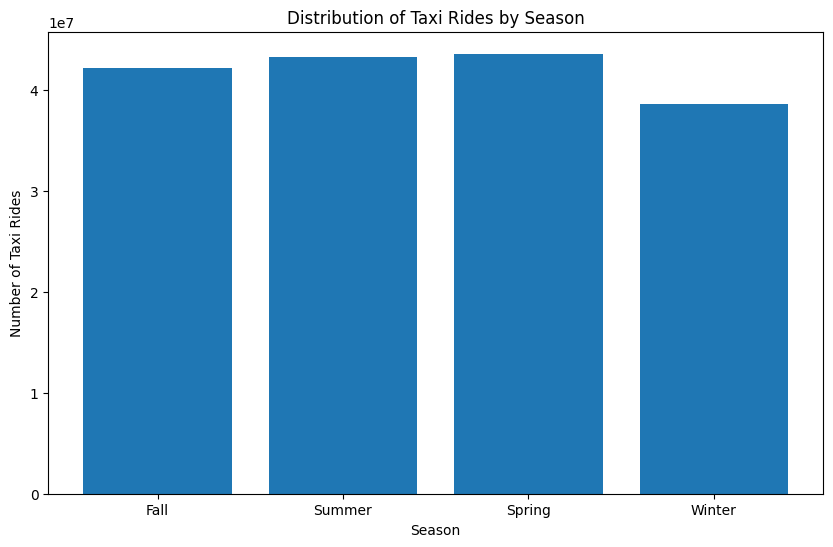

   Season  Taxi Rides
0    Fall    42157222
1  Summer    43220812
2  Spring    43582843
3  Winter    38579041


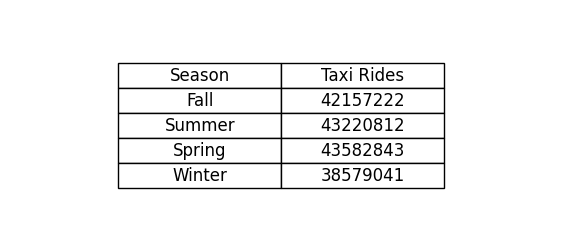

In [5]:
if data:
    # Initialize a defaultdict to count taxi rides by season
    season_counts = defaultdict(int)
    
    # Map each month to its corresponding season
    month_to_season = {
        1: 'Winter', 2: 'Winter', 3: 'Spring',
        4: 'Spring', 5: 'Spring', 6: 'Summer',
        7: 'Summer', 8: 'Summer', 9: 'Fall',
        10: 'Fall', 11: 'Fall', 12: 'Winter'
    }
    
    # Extract month from trip_start_timestamp for each record and count occurrences by season
    for record in data:
        start_timestamp = record.get("Trip Start Timestamp", "")
        if start_timestamp:
            start_date = datetime.strptime(start_timestamp, "%m/%d/%Y %I:%M:%S %p")
            month = start_date.month
            season = month_to_season[month]
            season_counts[season] += 1

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(season_counts.keys(), season_counts.values())
    plt.xlabel("Season")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Season")
    plt.show()
    
    # Create the table data
    table_data = [['Season', 'Taxi Rides']]
    for season, count in season_counts.items():
        table_data.append([season, count])
    
    # Convert table data to a DataFrame
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
    
    # Display the DataFrame
    print(df)
    
    # Plot the table
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")


Sorting the Data by Year

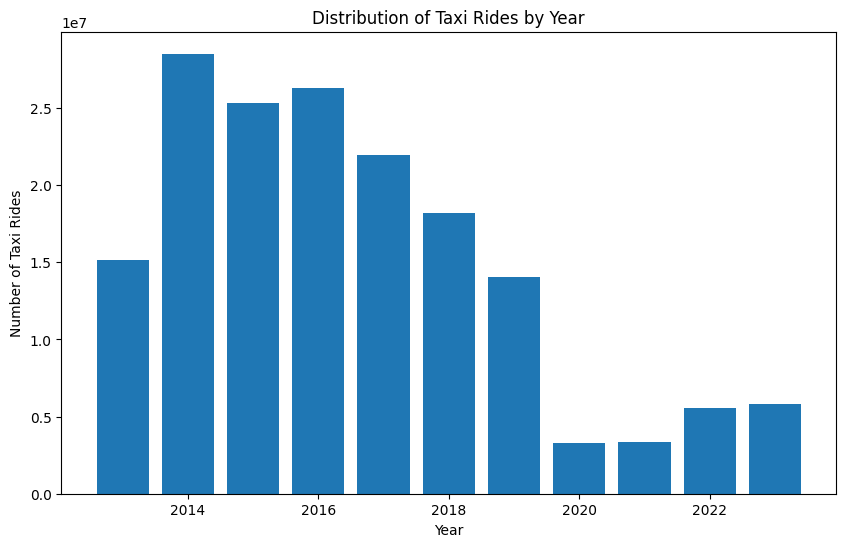

    Year  Taxi Rides
0   2013    15168652
1   2014    28518897
2   2015    25299652
3   2016    26316377
4   2017    21984306
5   2018    18177549
6   2019    14046925
7   2020     3267225
8   2021     3359222
9   2022     5586853
10  2023     5814260


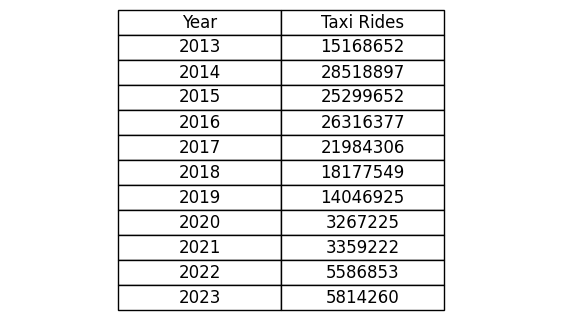

In [6]:
if data:
    # Extract year from trip_start_timestamp for each record and count occurrences by year
    year_counts = defaultdict(int)
    all_years = range(2013, 2024)  # Define the range of years you want to consider
    
    for record in data:
        start_timestamp = record.get("Trip Start Timestamp", "")
        if start_timestamp:
            start_date = datetime.strptime(start_timestamp, "%m/%d/%Y %I:%M:%S %p")
            year = start_date.year
            year_counts[year] += 1

    # Ensure all years are included in the counts
    for year in all_years:
        year_counts[year] = year_counts.get(year, 0)

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(year_counts.keys(), year_counts.values())
    plt.xlabel("Year")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Year")
    plt.show()
    
    # Create the table data
    table_data = [['Year', 'Taxi Rides']]
    for year in sorted(all_years):
        table_data.append([year, year_counts[year]])
    
    # Convert table data to a DataFrame
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
    
    # Display the DataFrame
    print(df)
    
    # Plot the table
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")

Sorting by Trip Length by Miles

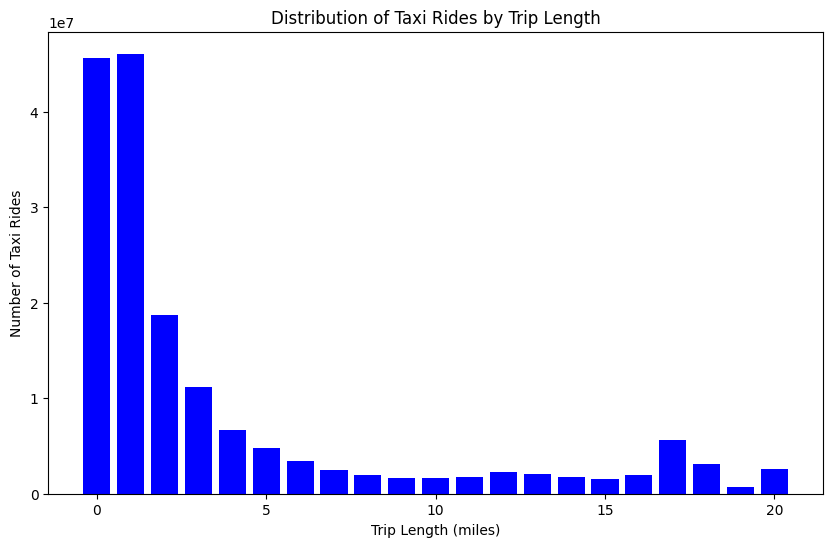

    Trip Length (miles)  Taxi Rides
0                     0    45690373
1                     1    46091858
2                     2    18737780
3                     3    11166956
4                     4     6650690
5                     5     4802601
6                     6     3397705
7                     7     2537029
8                     8     1949900
9                     9     1676775
10                   10     1623554
11                   11     1720305
12                   12     2223293
13                   13     2052512
14                   14     1724531
15                   15     1518117
16                   16     1939866
17                   17     5634940
18                   18     3085694
19                   19      672844
20                   20     2639696


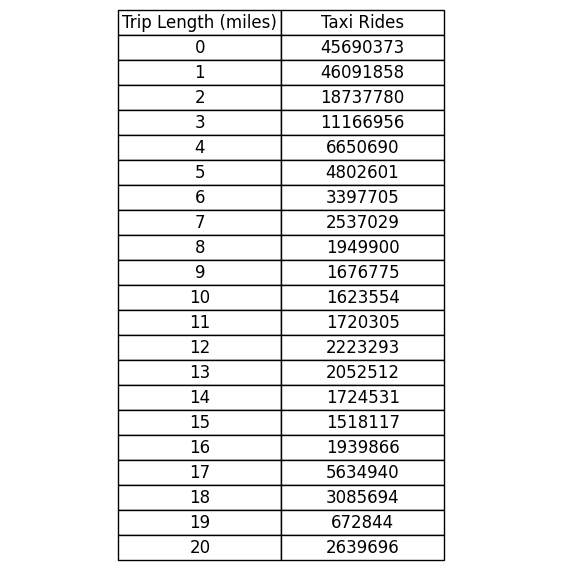

In [7]:
if data:
    # Calculate trip lengths and count the number of taxi rides for each trip length interval
    trip_length_counts = {}
    for record in data:
        trip_miles = record.get("Trip Miles", None)
        
        # Check if trip miles is not empty and is a valid number
        if trip_miles is not None and trip_miles.replace('.', '', 1).isdigit():
            try:
                trip_length = min(float(trip_miles), 20)  # Convert trip miles to float and limit to maximum 20
                
                # Define trip length intervals (e.g., every 1 mile)
                interval = 1
                trip_length_interval = int(trip_length / interval) * interval
                
                # Handle trips over 20 miles
                if trip_length > 20:
                    trip_length_interval = "20+"
                
                # Accumulate counts within each trip length interval
                trip_length_counts[trip_length_interval] = trip_length_counts.get(trip_length_interval, 0) + 1
            except ValueError:
                # Handle any parsing errors
                print("Error parsing trip miles for record:", record)
    
    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(trip_length_counts.keys(), trip_length_counts.values(), width=0.8, color='blue')  # Adjust width and color as needed
    plt.xlabel("Trip Length (miles)")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Trip Length")
    plt.show()
    
    # Create the table data
    table_data = [['Trip Length (miles)', 'Taxi Rides']]
    for trip_length, count in sorted(trip_length_counts.items()):
        table_data.append([trip_length, count])
    
    # Convert table data to a DataFrame
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
    
    # Display the DataFrame
    print(df)
    
    # Plot the table
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")

Sorting by Trip Start Time

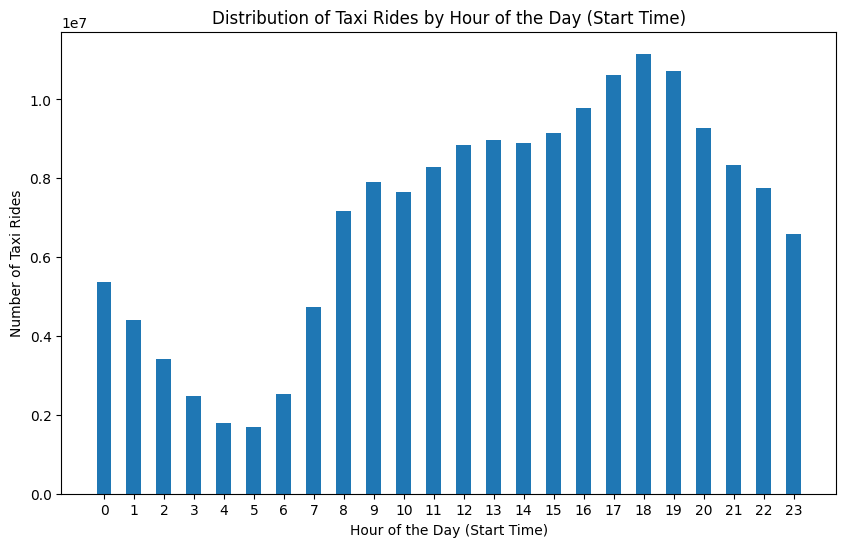

    Hour of the Day (Start Time)  Taxi Rides
0                              0     5377840
1                              1     4411827
2                              2     3419073
3                              3     2478560
4                              4     1803598
5                              5     1700737
6                              6     2529095
7                              7     4737234
8                              8     7163322
9                              9     7897771
10                            10     7642536
11                            11     8293445
12                            12     8855384
13                            13     8958866
14                            14     8894760
15                            15     9147623
16                            16     9771181
17                            17    10617583
18                            18    11158380
19                            19    10728860
20                            20     9281476
21        

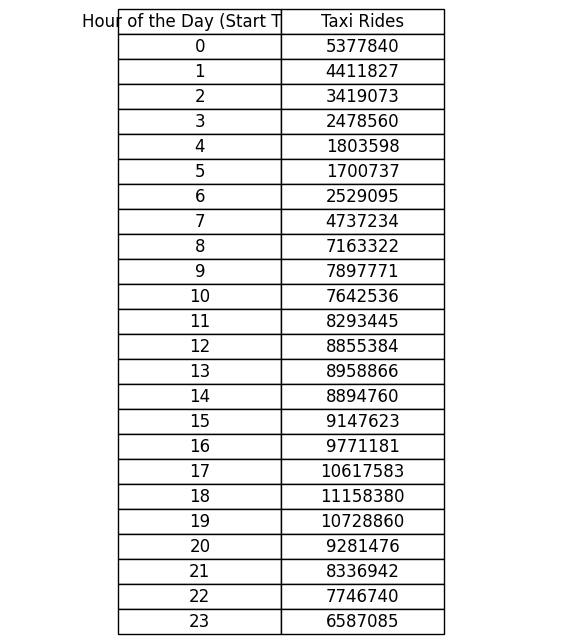

In [8]:
# Filter out records with missing or invalid trip start timestamp
data = [record for record in data if record.get("Trip Start Timestamp")]

if data:
    # Sort the data by the trip start timestamp
    data.sort(key=lambda x: datetime.strptime(x["Trip Start Timestamp"], "%m/%d/%Y %I:%M:%S %p"))
    
    # Count the number of taxi rides for each trip start hour
    trip_start_hour_counts = {}
    for record in data:
        trip_start_time = datetime.strptime(record["Trip Start Timestamp"], "%m/%d/%Y %I:%M:%S %p")
        trip_start_hour = trip_start_time.hour
        trip_start_hour_counts[trip_start_hour] = trip_start_hour_counts.get(trip_start_hour, 0) + 1
    
    # Plot the data as a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(trip_start_hour_counts.keys(), trip_start_hour_counts.values(), width=0.5)
    plt.xlabel("Hour of the Day (Start Time)")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Hour of the Day (Start Time)")
    plt.xticks(range(24))
    plt.show()
    
    # Create the table data
    table_data = [['Hour of the Day (Start Time)', 'Taxi Rides']]
    for hour, count in sorted(trip_start_hour_counts.items()):
        table_data.append([hour, count])
    
    # Convert table data to a DataFrame
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
    
    # Display the DataFrame
    print(df)
    
    # Plot the table
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")

Sorting by Sports Seasons

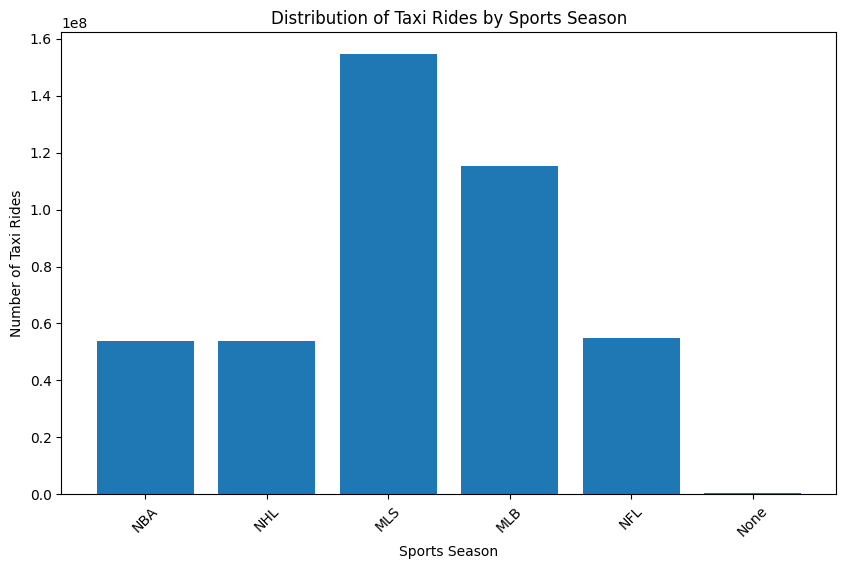

  Sports Season  Taxi Rides
0           NBA    53776470
1           NHL    53776470
2           MLS   154573098
3           MLB   115212030
4           NFL    54825452
5          None      364254


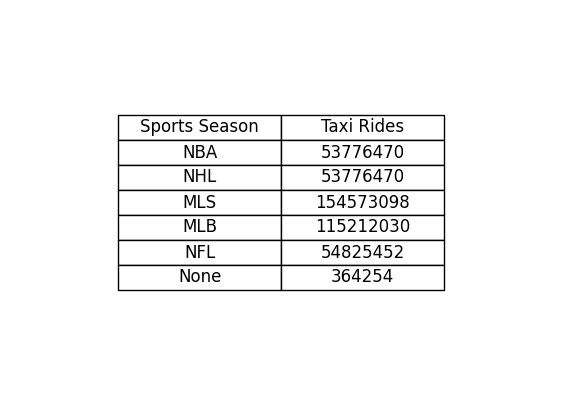

In [9]:
if data:
    # Initialize a defaultdict to count taxi rides by season
    season_counts = defaultdict(int)
    
    # Define start and end dates for each major sports season (recurring every year)
    seasons = {
        "NBA": {"start": (10, 1), "end": (4, 30)},
        "MLB": {"start": (3, 1), "end": (10, 31)},
        "NFL": {"start": (9, 1), "end": (12, 31)},
        "NHL": {"start": (10, 1), "end": (4, 30)},
        "MLS": {"start": (2, 1), "end": (12, 31)}
    }
    
    # Function to categorize a timestamp into sports seasons
    def categorize_season(timestamp):
        if timestamp:
            timestamp = datetime.strptime(timestamp, "%m/%d/%Y %I:%M:%S %p")
            matched_seasons = []
            for sport, dates in seasons.items():
                start_month, start_day = dates["start"]
                end_month, end_day = dates["end"]
                
                # Adjust the year for NHL and NBA if the timestamp falls after April
                if start_month > end_month and timestamp.month < start_month:
                    season_start = datetime(timestamp.year - 1, start_month, start_day)
                    season_end = datetime(timestamp.year, end_month, end_day)
                else:
                    season_start = datetime(timestamp.year, start_month, start_day)
                    season_end = datetime(timestamp.year, end_month, end_day)
                
                # Check if the timestamp falls within the season
                if season_start <= timestamp <= season_end:
                    matched_seasons.append(sport)
            if matched_seasons:
                return matched_seasons
        return ['None']  # Return 'None' if no sports season is matched

    # Sort the data by major sports seasons
    for record in data:
        seasons_matched = categorize_season(record["Trip Start Timestamp"])
        for season in seasons_matched:
            season_counts[season] += 1
    
    # Plot the data as a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(season_counts.keys(), season_counts.values())
    plt.xlabel("Sports Season")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Sports Season")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()
    
    # Create the table data
    table_data = [['Sports Season', 'Taxi Rides']]
    for season, count in season_counts.items():
        table_data.append([season, count])
    
    # Convert table data to a DataFrame
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
    
    # Display the DataFrame
    print(df)
    
    # Plot the table
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")

Sorting by Day of Week

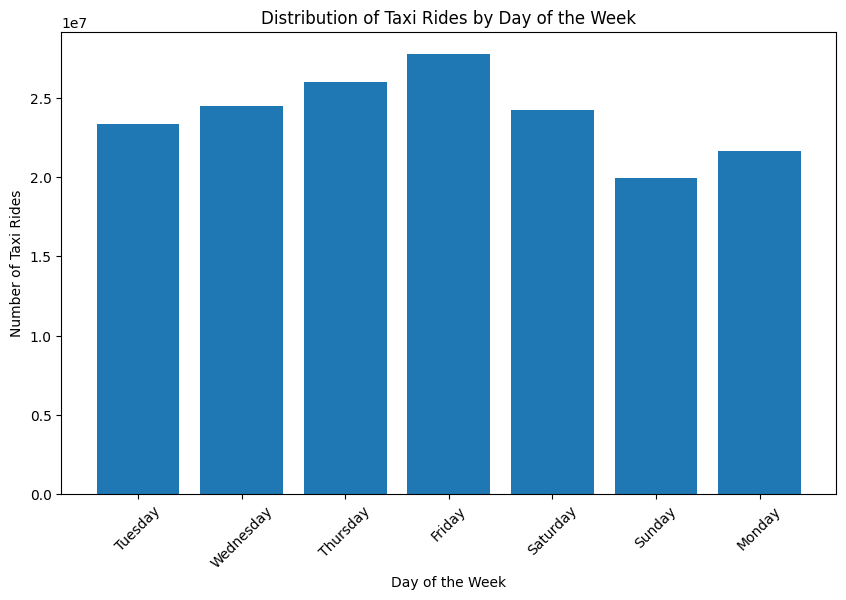

  Day of the Week  Taxi Rides
0         Tuesday    23370912
1       Wednesday    24512089
2        Thursday    26008163
3          Friday    27793705
4        Saturday    24262239
5          Sunday    19956263
6          Monday    21636547


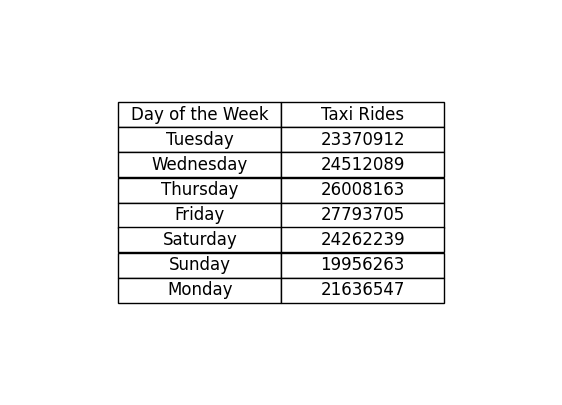

In [10]:
if data:
    # Initialize a defaultdict to count taxi rides by day of the week
    day_of_week_counts = defaultdict(int)
    
    # Function to categorize a timestamp into day of the week
    def categorize_day_of_week(timestamp):
        timestamp = datetime.strptime(timestamp, "%m/%d/%Y %I:%M:%S %p")
        return timestamp.strftime("%A")  # Return the full name of the day of the week
    
    # Sort the data by day of the week
    for record in data:
        day_of_week = categorize_day_of_week(record["Trip Start Timestamp"])
        day_of_week_counts[day_of_week] += 1
    
    # Plot the data as a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(day_of_week_counts.keys(), day_of_week_counts.values())
    plt.xlabel("Day of the Week")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Day of the Week")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()
    
    # Create the table data
    table_data = [['Day of the Week', 'Taxi Rides']]
    for day, count in day_of_week_counts.items():
        table_data.append([day, count])
    
    # Convert table data to a DataFrame
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
    
    # Display the DataFrame
    print(df)
    
    # Plot the table
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")

Sorting by Top 20 Pickup Locations

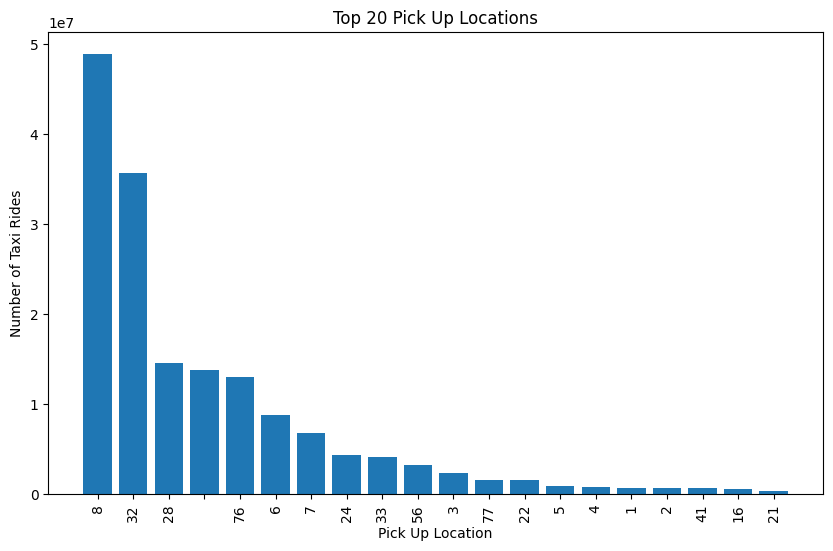

   Pick Up Location  Taxi Rides
0                 8    48900676
1                32    35720771
2                28    14600417
3                      13818634
4                76    12974812
5                 6     8781955
6                 7     6738863
7                24     4319518
8                33     4137877
9                56     3207503
10                3     2320359
11               77     1582919
12               22     1531529
13                5      835922
14                4      768132
15                1      701891
16                2      663552
17               41      620398
18               16      587672
19               21      385486


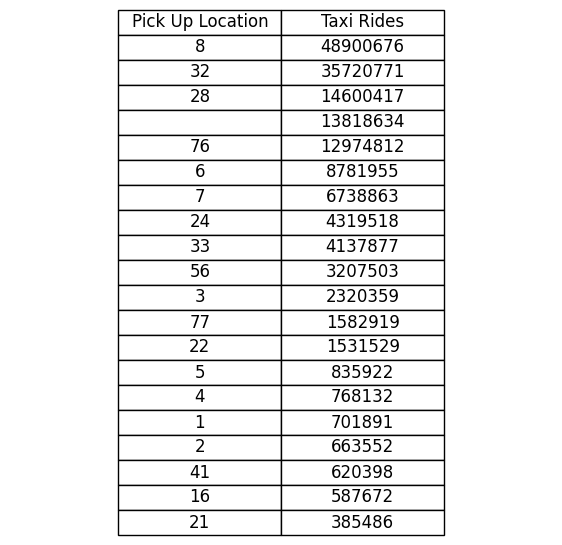

In [11]:
if data:
    # Initialize a defaultdict to count taxi rides by pick up location
    pickup_counts = defaultdict(int)
    
    # Function to categorize a trip by pick up location
    def categorize_pickup_location(pickup_location):
        return pickup_location
    
    # Sort the data by pick up location and count occurrences
    for record in data:
        pickup_location = record["Pickup Community Area"]
        pickup_counts[pickup_location] += 1
    
    # Sort the pickup counts dictionary by values in descending order
    sorted_pickup_counts = dict(sorted(pickup_counts.items(), key=lambda item: item[1], reverse=True))
    
    # Select only the top 20 pick up locations
    top_20_pickup_locations = dict(list(sorted_pickup_counts.items())[:20])
    
    # Plot the data as a bar graph for top 20 pickup locations
    plt.figure(figsize=(10, 6))  # Adjust figsize as needed
    
    plt.bar(top_20_pickup_locations.keys(), top_20_pickup_locations.values())
    plt.xlabel("Pick Up Location")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Top 20 Pick Up Locations")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()
    
    # Create the table data
    table_data = [['Pick Up Location', 'Taxi Rides']]
    for location, count in top_20_pickup_locations.items():
        table_data.append([location, count])
    
    # Convert table data to a DataFrame
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
    
    # Display the DataFrame
    print(df)
    
    # Plot the table
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")

Sorting by Top 20 Drop-Off Locations

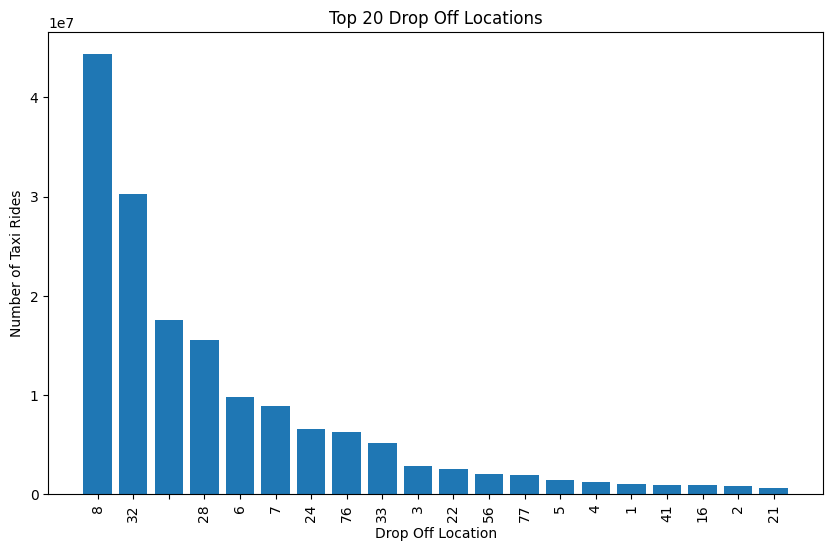

   Drop Off Location  Taxi Rides
0                  8    44386895
1                 32    30243581
2                       17505798
3                 28    15524491
4                  6     9737253
5                  7     8912419
6                 24     6539968
7                 76     6205500
8                 33     5103563
9                  3     2863114
10                22     2535747
11                56     1990573
12                77     1897664
13                 5     1428908
14                 4     1196350
15                 1      956110
16                41      882259
17                16      868797
18                 2      824416
19                21      650629


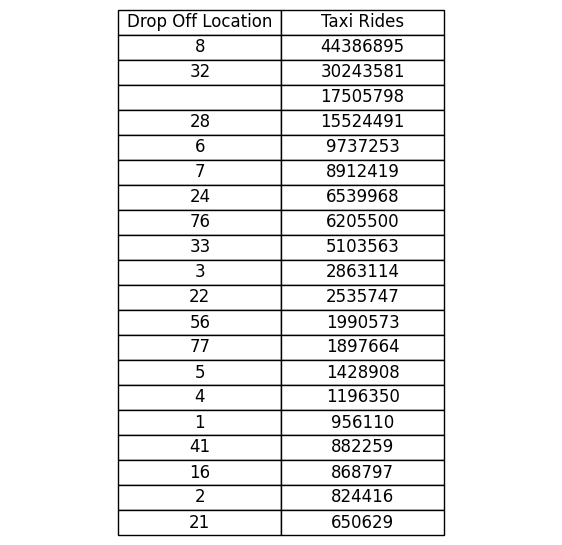

In [12]:
if data:
    # Initialize a defaultdict to count taxi rides by drop off location
    dropoff_counts = defaultdict(int)
    
    # Function to categorize a trip by drop off location
    def categorize_dropoff_location(dropoff_location):
        return dropoff_location
    
    # Sort the data by drop off location and count occurrences
    for record in data:
        dropoff_location = record["Dropoff Community Area"]
        dropoff_counts[dropoff_location] += 1
    
    # Sort the dropoff counts dictionary by values in descending order
    sorted_dropoff_counts = dict(sorted(dropoff_counts.items(), key=lambda item: item[1], reverse=True))
    
    # Select only the top 20 drop-off locations
    top_20_dropoff_locations = dict(list(sorted_dropoff_counts.items())[:20])
    
    # Plot the data as a bar graph for top 20 drop-off locations
    plt.figure(figsize=(10, 6))  # Adjust figsize as needed
    
    plt.bar(top_20_dropoff_locations.keys(), top_20_dropoff_locations.values())
    plt.xlabel("Drop Off Location")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Top 20 Drop Off Locations")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()
    
    # Create the table data
    table_data = [['Drop Off Location', 'Taxi Rides']]
    for location, count in top_20_dropoff_locations.items():
        table_data.append([location, count])
    
    # Convert table data to a DataFrame
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
    
    # Display the DataFrame
    print(df)
    
    # Plot the table
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")